In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import Scaler
from sklearn.preprocessing import StandardScaler

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# import colour map
import matplotlib.cm as cm

# import min/max scaler 
from sklearn.preprocessing import MinMaxScaler

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Import Data
detailed_transactions_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/all_transactions_data.csv')
transactions = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_transactions_df.csv')
checkings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_checkings_df.csv')
savings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_savings_df.csv')
credit = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_credit_df.csv')

## KMeans clustering on transactions using KMeans++ initialization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

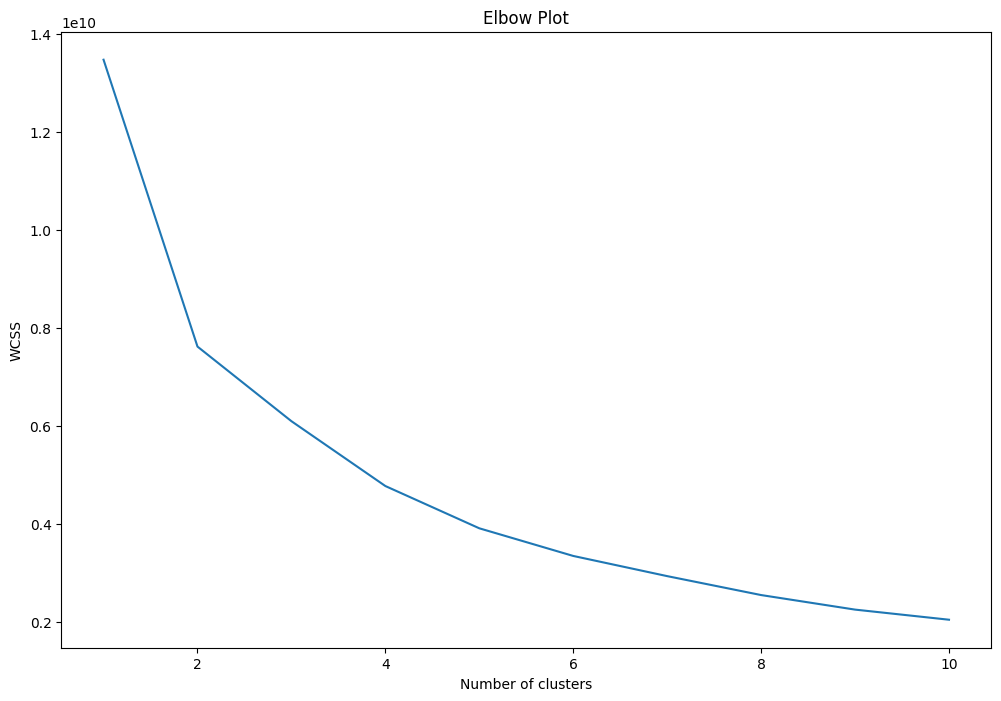

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Copy the transactions dataframe
transactions_copy = transactions.copy()

# Extract relevant columns
X = transactions_copy[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Initialize an empty list to store the WCSS values
wcss = []

# Fit KMeans model with different number of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Save the plot as a PNG file
plt.savefig('transactions_elbow_plot.png')

plt.show()

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

transactions_copy = transactions.copy()

# Extract relevant columns
X = transactions_copy[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Fit KMeans model with 3 clusters and kmeans++ initialization
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the transactions dataframe
transactions_copy['cluster_labels'] = cluster_labels

# Analyze the clusters
transactions_copy.groupby('cluster_labels').mean()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
cluster_labels,,,,,,,,,,,,,,,,,,,
0,1.362993e+06,2.676471,15.541176,14.264706,0.152941,10.752941,0.158824,1.705882,2.041176,11.194118,14.200000,7.111765,6.317647,21.976471,22.522983,131.112118,1951.296118,1685.650412,1816.573000
1,1.362988e+06,2.281501,18.989276,13.233244,0.010724,10.560322,0.112601,2.214477,2.265416,9.158177,16.080429,6.184987,7.450402,25.345845,16.302655,57.503029,66.490643,-858.123834,-800.771367
2,1.362992e+06,2.347107,22.743802,16.661157,0.024793,2.157025,0.033058,3.123967,2.528926,10.876033,20.446281,6.190083,11.008264,39.909091,14.032654,127.596116,-300.942645,-5251.735041,-5124.304793


## Plot clusters with PCA

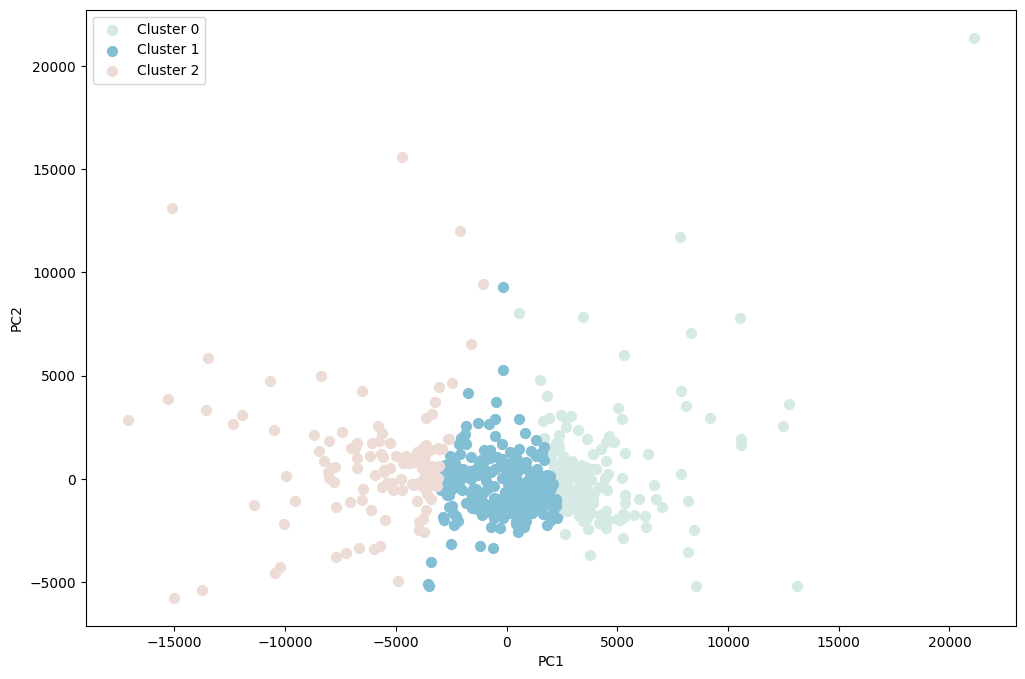

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select relevant columns for PCA
X = transactions[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the transformed data with cluster labels
colors = ['#D5EAE5', '#82BED4', '#EDDBD6']
for i in range(3):
    plt.scatter(X_pca[cluster_labels==i, 0], X_pca[cluster_labels==i, 1], s=50, c=colors[i], label='Cluster '+str(i))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('BH_PCA_cluster_transactions_df.png')
plt.show() 

In [49]:
transactions_copy.head(100)

,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt,cluster_labels
0,1362480,1,15,20,1,25,0,1,2,12,23,12,13,32,26.182107,378.28,1254.83,1807.71,2185.99,0
1,1362484,1,38,30,0,0,0,3,13,15,15,12,10,50,18.816515,33.08,1847.77,302.31,335.39,0
2,1362485,7,50,16,0,23,0,0,1,0,19,12,13,30,5.223484,56.93,-1009.03,-981.91,-925.52,1
3,1362486,0,0,5,0,0,0,0,0,24,3,0,5,13,29.791667,57.20,3428.51,-1165.56,-1108.36,1
4,1362487,3,23,3,0,0,0,12,0,19,12,4,6,21,21.713894,51.12,-134.13,-3603.25,-3553.12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1362622,2,31,32,1,0,0,1,1,16,20,7,10,55,17.784807,444.15,13887.73,1894.47,2338.08,0
96,1362623,0,0,8,0,11,0,0,7,12,11,0,5,14,25.994194,2.12,156.32,-261.61,-259.49,1
97,1362624,9,28,4,0,0,0,0,1,12,1,12,3,5,20.630833,73.04,-371.99,-107.84,-34.80,1
98,1362625,0,28,4,0,3,4,1,0,3,3,12,2,3,14.363636,79.20,-202.11,2499.06,2577.18,0


In [50]:
mean_data = transactions_copy.groupby('cluster_labels').mean()
mean_data = mean_data.reset_index()
mean_data

,cluster_labels,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
0,0,1.362993e+06,2.676471,15.541176,14.264706,0.152941,10.752941,0.158824,1.705882,2.041176,11.194118,14.200000,7.111765,6.317647,21.976471,22.522983,131.112118,1951.296118,1685.650412,1816.573000
1,1,1.362988e+06,2.281501,18.989276,13.233244,0.010724,10.560322,0.112601,2.214477,2.265416,9.158177,16.080429,6.184987,7.450402,25.345845,16.302655,57.503029,66.490643,-858.123834,-800.771367
2,2,1.362992e+06,2.347107,22.743802,16.661157,0.024793,2.157025,0.033058,3.123967,2.528926,10.876033,20.446281,6.190083,11.008264,39.909091,14.032654,127.596116,-300.942645,-5251.735041,-5124.304793


## Plot Radar Chart

In [51]:
import plotly.graph_objects as go
import plotly.express as px

# Define the categories and their labels for the radar chart
categories = ['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']

fig = go.Figure()

for i in mean_data.index:
    df = mean_data.loc[i][categories]
    values = df.values.tolist()
    fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name = f"Cluster {i}"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[mean_data[categories].values.min(), mean_data[categories].values.max()]
    )),
  showlegend=True,
  title='Radar Chart of Cluster Attributes'
)
fig.write_image("transactions_radar_chart.png")

fig.show()

## Hierarchal Clustering on transactions_df

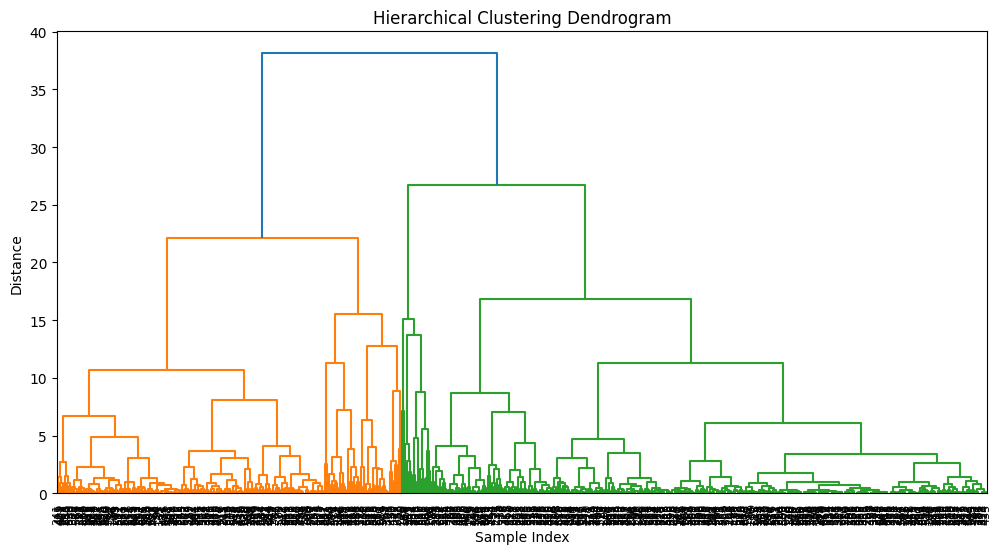

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Extract the variables for clustering
X = transactions.iloc[:, 15:19].values

# Normalize the variables to have zero mean and unit variance
sc = StandardScaler()
X = sc.fit_transform(X)

# Perform hierarchical clustering using Ward's method and 3 clusters
Z = linkage(X, method='ward')
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(X)

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.savefig('BH_hierarchal_transactions_df.png')
plt.show()

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Extract the variables for clustering
X = transactions.iloc[:, 15:19].values

# Normalize the variables to have zero mean and unit variance
sc = StandardScaler()
X = sc.fit_transform(X)

# Perform hierarchical clustering using Ward's method and 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(X)

# Create a copy of the transactions table
transactions_h_clustered = transactions.copy()

# Add the cluster labels as a new column in the copy of the transactions table
transactions_h_clustered['Cluster'] = clusters


In [174]:
h_mean_data = transactions_h_clustered.groupby('Cluster').mean()
h_mean_data = h_mean_data.reset_index()
h_mean_data

,Cluster,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
0,0,1.362996e+06,2.504065,22.203252,16.520325,0.012195,4.439024,0.044715,3.418699,2.833333,11.065041,20.186992,6.760163,10.378049,36.808943,15.790697,106.316341,-200.011098,-3554.035000,-3447.882561
1,1,1.362989e+06,2.347607,16.508816,12.302267,0.060453,11.717884,0.156171,1.594458,1.929471,9.163728,13.984887,6.181360,6.093199,20.710327,18.504447,62.469093,486.723728,401.925718,464.231587
2,2,1.362946e+06,2.000000,21.952381,20.428571,0.285714,13.523810,0.000000,0.952381,1.666667,13.095238,17.523810,7.047619,10.142857,35.333333,17.951041,391.560476,8384.795238,2178.501905,2569.903810


In [175]:
import plotly.graph_objects as go
import plotly.express as px

# Define the categories and their labels for the radar chart
categories = transactions.columns[15:19].tolist()

fig = go.Figure()

for i in h_mean_data.index:
    df = h_mean_data.loc[i][categories]
    values = df.values.tolist()
    fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name = f"Cluster {i}"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[h_mean_data[categories].values.min(), h_mean_data[categories].values.max()]
    )),
  showlegend=True,
  title='Radar Chart of Cluster Attributes'
)

fig.show()


## KMeans clustering on merged_savings_df using KMeans++ initialization

In [15]:
null_mask = savings[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']].isnull().any(axis=1)
null_rows = savings[null_mask]
null_rows

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,average_transaction_time,tran_amt,principal_amt,interest_amt,new_balance,avg_days_btwn_trans
252,1362890,13628903,100,BS,N,1990-05-23,1995-01-18,104.78,104.78,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
savings = savings.drop(index=252)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

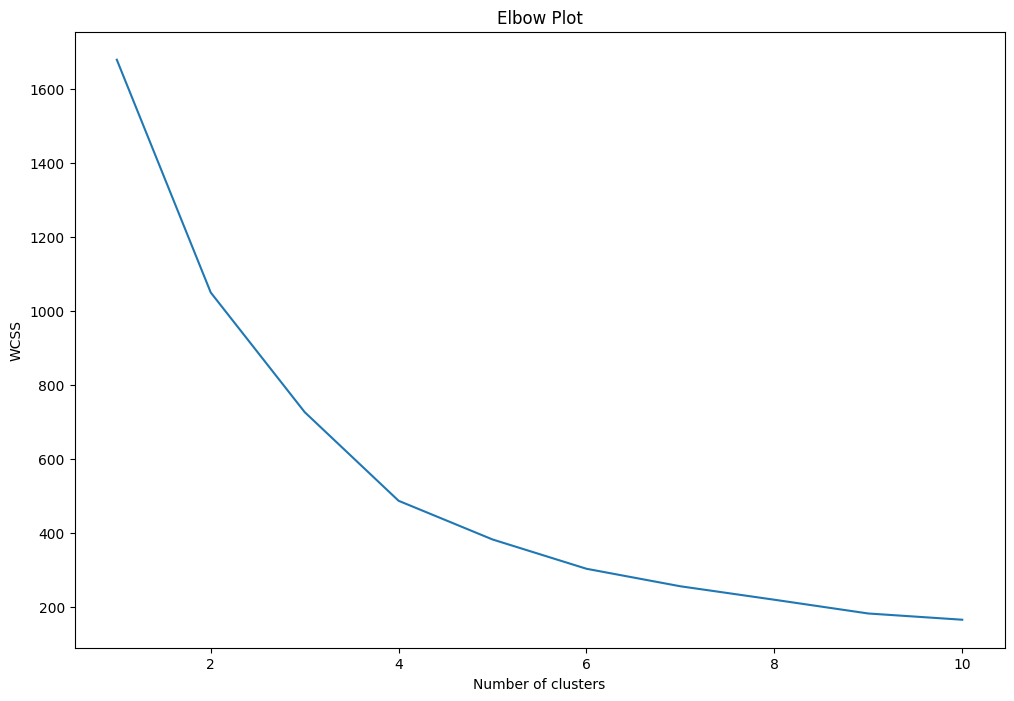

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Copy the savings dataframe
savings_copy = savings.copy()

# Extract relevant columns
X = savings_copy.iloc[:, 10:14]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an empty list to store the WCSS values
wcss = []

# Fit KMeans model with different number of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('BH_savings_elbow_plot.png')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



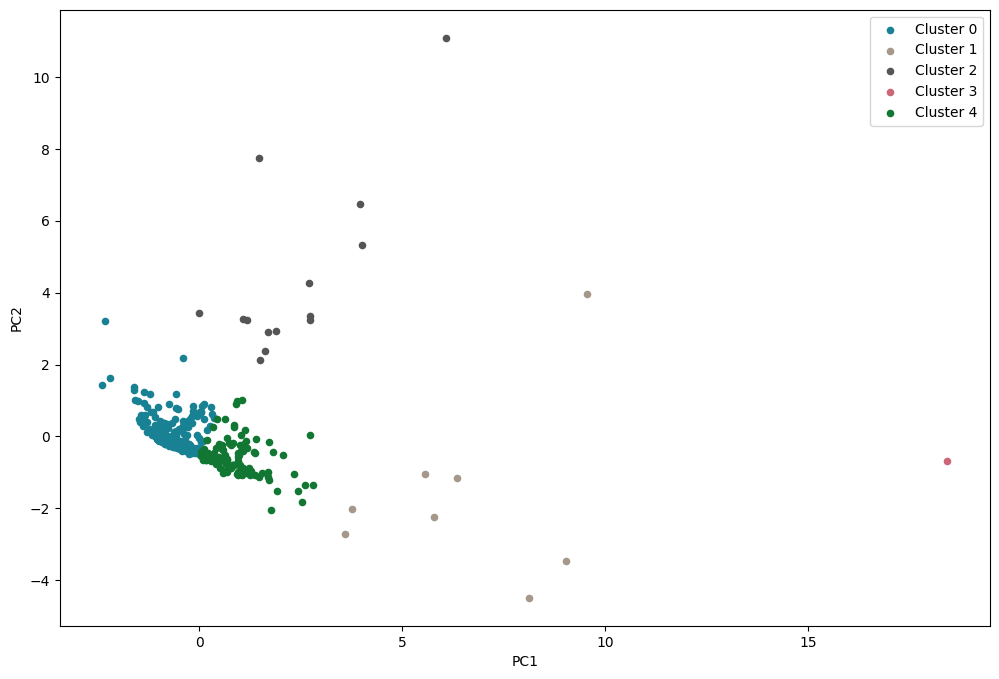

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant columns for clustering
X = savings_copy.iloc[:, 10:14]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means with 3 clusters
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(X_scaled)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the transformed data with cluster labels
colors = ['#188193', '#a5978a', '#555653', '#CC6677', '#117733']
for i in range(5):
    cluster_i = (cluster_labels == i)[:X_pca.shape[0]]
    plt.scatter(X_pca[cluster_i, 0], X_pca[cluster_i, 1], s=20, c=colors[i], label='Cluster '+str(i))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('savings_PCA_clusters.png')
plt.show()

In [19]:
from scipy import stats

# Calculate the Z-scores of each feature in the financial data
numeric_columns = savings_copy.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(savings_copy[numeric_columns]))

# Detect the outliers based on the Z-scores
outliers = (z_scores > 3).any(axis=1)

# View the outlier rows
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
416    False
417    False
418    False
419    False
420    False
Length: 420, dtype: bool

Removing 19 outliers as noise can improve the accuracy and reliability of financial analysis by reducing the influence of noise and increasing the signal-to-noise ratio in the data.

In [20]:
savings_copy = savings_copy[~outliers]

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

savings_copy = savings.copy()

# Select the columns to use for clustering
X = savings_copy.iloc[:, 10:14]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans model with 5 clusters and kmeans++ initialization
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the savings dataframe
savings_copy['cluster_labels'] = cluster_labels

# Convert all columns to numeric values
savings_copy = savings_copy.apply(pd.to_numeric, errors='coerce')

# Select columns with numeric values
numeric_columns = savings_copy.select_dtypes(include=[np.number]).columns.tolist()

# Perform clustering on numeric columns
cluster_means = savings_copy.groupby('cluster_labels').mean()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [22]:
# Group savings_copy by cluster_labels and compute mean for each cluster
savings_clustered = savings_copy.groupby('cluster_labels').mean()

# Reset index to turn 'cluster_labels' into a regular column
savings_clustered = savings_clustered.reset_index()

# Rename column names to match h_mean_data
savings_clustered = savings_clustered.rename(columns={'cluster_labels': 'Cluster', 'starting_balance': 'Starting_Balance', 'ending_balance': 'Ending_Balance', 'average_transaction_time': 'Avg_Transaction_Time', 'tran_amt': 'Transaction_Amount', 'principal_amt': 'Principal_Amount', 'interest_amt': 'Interest_Amount', 'new_balance': 'New_Balance', 'avg_days_btwn_trans': 'Avg_Days_Between_Trans'})

# Print the resulting dataframe
savings_clustered

,Cluster,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,Starting_Balance,Ending_Balance,Avg_Transaction_Time,Transaction_Amount,Principal_Amount,Interest_Amount,New_Balance,Avg_Days_Between_Trans
0,0,1.363011e+06,1.363012e+07,192.537313,NaN,NaN,NaN,NaN,898.153060,1883.988358,NaN,986.175149,962.818433,23.356716,1861.739478,12.507288
1,1,1.362953e+06,1.362954e+07,407.692308,NaN,NaN,NaN,NaN,7961.205385,7686.930769,NaN,-273.803846,-482.914615,209.110769,7686.930769,16.699994
2,2,1.362977e+06,1.362977e+07,182.706767,NaN,NaN,NaN,NaN,441.673083,404.659850,NaN,-36.795677,-45.694511,8.898835,407.098083,16.900640
3,3,1.362766e+06,1.362766e+07,100.000000,NaN,NaN,NaN,NaN,11352.930000,22432.780000,NaN,11079.940000,10761.770000,318.170000,22432.780000,6.703704
4,4,1.363025e+06,1.363025e+07,300.000000,NaN,NaN,NaN,NaN,2531.455000,7846.991667,NaN,5315.716667,5190.638333,125.078333,7846.991667,9.582243


In [23]:
# Define the categories and their labels for the radar chart
categories = categories = ['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']

# Plot the radar chart
fig = go.Figure()

for i in cluster_means.index:
    df = cluster_means.loc[i][categories]
    values = df.values.tolist()
    fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name = f"Cluster {i}"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[cluster_means[categories].values.min(), cluster_means[categories].values.max()]
    )),
  showlegend=True,
  title='Radar Chart of Cluster Attributes'
)
fig.write_image("savings_radar_chart.png")
fig.show()

In [24]:
# Create a dictionary to store the correlation coefficients for each variable in each cluster
r_values = {}
for i in cluster_means.index:
    r_values[f"Cluster {i}"] = {}
    for var in categories:
        r = cluster_means.loc[i, var]
        r_values[f"Cluster {i}"][var] = r

# Create a pandas dataframe to display the correlation coefficients in a table
credit_rvalue = pd.DataFrame(r_values).T
credit_rvalue = credit_rvalue.applymap(lambda x: round(x, 2))
credit_rvalue.index.name = "Cluster"
credit_rvalue.columns.name = "Variable"

# Display the dataframe
credit_rvalue

Variable,interest_amt,new_balance,principal_amt,tran_amt
Cluster,,,,
Cluster 0,23.36,1861.74,962.82,986.18
Cluster 1,209.11,7686.93,-482.91,-273.80
Cluster 2,8.90,407.10,-45.69,-36.80
Cluster 3,318.17,22432.78,10761.77,11079.94
Cluster 4,125.08,7846.99,5190.64,5315.72


## KMeans clustering on merged_credit_df using KMeans++ initialization

In [29]:
# # Dropped rows where all the credit info needed below was null
# null_mask = credit[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']].isnull().any(axis=1)
# null_rows = credit[null_mask]
# credit = credit.drop(index=[125,165,246,284,345,358,395,396,409,412,429])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

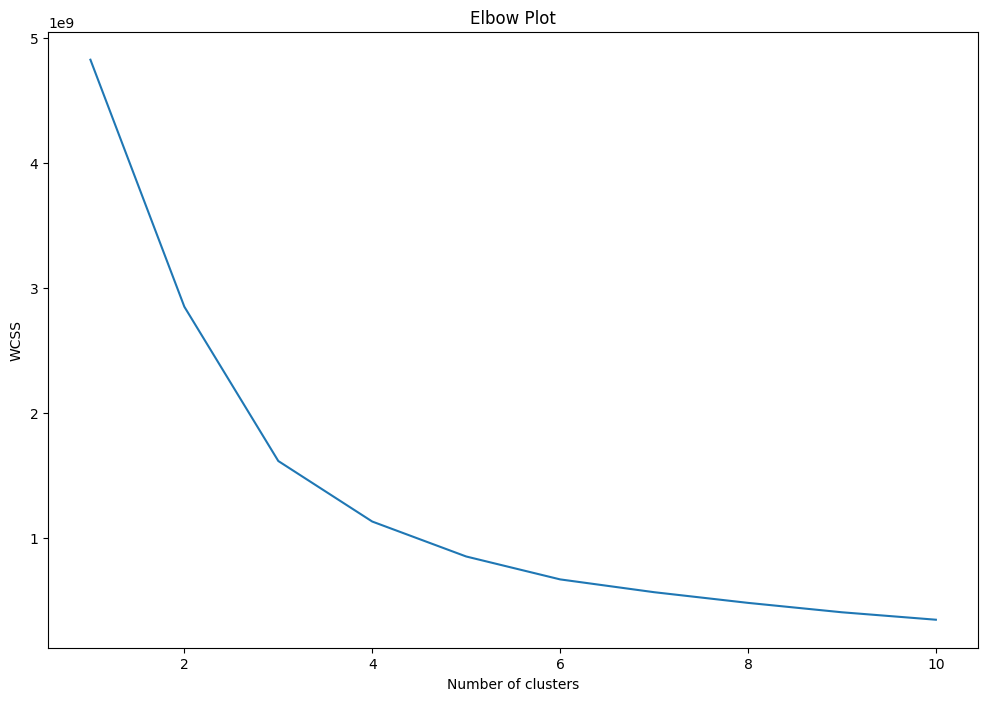

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Copy the savings dataframe
credit_copy = credit.copy()

# Extract relevant columns
X = credit_copy[['tran_amt', 'principal_amt', 'interest_amt', 'new_balance']]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize an empty list to store the WCSS values
wcss = []

# Fit KMeans model with different number of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('credit_elbow_plot.png')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



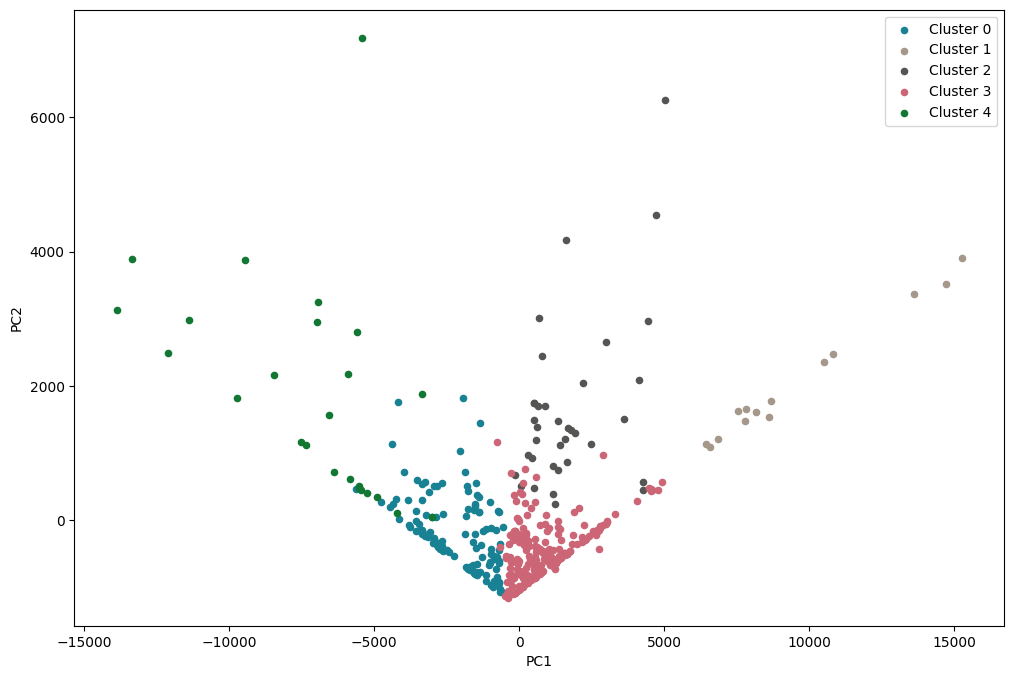

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns for PCA
X = credit_copy[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means with 5 clusters
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(X_scaled)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the transformed data with cluster labels
colors = ['#188193', '#a5978a', '#555653', '#CC6677', '#117733']
for i in range(5):
    cluster_i = (cluster_labels == i)[:X_pca.shape[0]]
    plt.scatter(X_pca[cluster_i, 0], X_pca[cluster_i, 1], s=20, c=colors[i], label='Cluster '+str(i))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('credit_PCA_clusters.png')
plt.show()

In [32]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans

credit_copy = credit.copy()

# Select the columns to use for clustering
X = credit_copy[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans model with 5 clusters and kmeans++ initialization
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the credit_copy dataframe
credit_copy['cluster_labels'] = cluster_labels

# Convert all columns to numeric values
credit_copy = credit_copy.apply(pd.to_numeric, errors='coerce')

# Select columns with numeric values
numeric_columns = credit_copy.select_dtypes(include=[np.number]).columns.tolist()

# Perform clustering on numeric columns
cluster_means = credit_copy.groupby('cluster_labels').mean()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [33]:
# Group savings_copy by cluster_labels and compute mean for each cluster
credit_clustered = credit_copy.groupby('cluster_labels').mean()

# Reset index to turn 'cluster_labels' into a regular column
credit_clustered = credit_clustered.reset_index()

# Rename column names to match h_mean_data
credit_clustered = credit_clustered.rename(columns={'cluster_labels': 'Cluster', 'starting_balance': 'Starting_Balance', 'ending_balance': 'Ending_Balance', 'average_transaction_time': 'Avg_Transaction_Time', 'tran_amt': 'Transaction_Amount', 'principal_amt': 'Principal_Amount', 'interest_amt': 'Interest_Amount', 'new_balance': 'New_Balance', 'avg_days_btwn_trans': 'Avg_Days_Between_Trans'})

# Print the resulting dataframe
credit_clustered

,Cluster,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,Starting_Balance,Ending_Balance,CA,CG,FA,IQ,PM,Transaction_Amount,Principal_Amount,Interest_Amount,New_Balance,Avg_Days_Between_Trans
0,0,1.362987e+06,4.561143e+15,1703.284672,0.288321,0.992701,NaN,NaN,502.467920,924.347409,3.335766,28.350365,0.003650,3.766423,9.708029,-356.546971,-418.103285,-61.795438,-922.128869,7.784889
1,1,1.362962e+06,4.561143e+15,9043.750000,0.000000,0.750000,NaN,NaN,7432.830625,1240.135000,2.812500,32.312500,0.125000,3.062500,10.500000,6484.521250,6192.735000,-292.073125,-1240.135000,9.006946
2,2,1.363031e+06,4.561143e+15,6664.285714,0.000000,1.000000,NaN,NaN,0.000000,6051.007143,2.928571,31.214286,0.000000,3.071429,3.000000,-5989.087857,-6034.758571,-45.722143,-6011.389286,2.549108
3,3,1.362984e+06,4.561143e+15,2984.693878,0.510204,0.602041,NaN,NaN,2196.216939,397.224184,3.612245,20.877551,0.306122,4.000000,9.653061,1926.251633,1803.985306,-122.520714,-397.554898,11.103690
4,4,1.362974e+06,4.561143e+15,3912.727273,0.345455,1.000000,NaN,NaN,979.159273,2868.564909,4.218182,30.963636,0.000000,5.200000,8.163636,-1701.322182,-1888.193636,-187.102182,-2856.643455,5.977139


In [36]:
# Define the categories and their labels for the radar chart
categories = ['interest_amt', 'new_balance', 'principal_amt', 'tran_amt', 'credit_limit']

# Plot the radar chart
import plotly.graph_objs as go
fig = go.Figure()

for i in cluster_means.index:
    df = cluster_means.loc[i][categories]
    values = df.values.tolist()
    fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name = f"Cluster {i}"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[cluster_means[categories].values.min(), cluster_means[categories].values.max()]
    ),
    angularaxis=dict(
      categoryarray=categories,
      categoryorder='array'
    )
  ),
  showlegend=True,
  title='Radar Chart of Cluster Attributes'
)
fig.write_image("credit_radar_chart.png")
fig.show()


In [37]:
# Create a dictionary to store the correlation coefficients for each variable in each cluster
r_values = {}
for i in cluster_means.index:
    r_values[f"Cluster {i}"] = {}
    for var in categories:
        r = cluster_means.loc[i, var]
        r_values[f"Cluster {i}"][var] = r

# Create a pandas dataframe to display the correlation coefficients in a table
credit_rvalue = pd.DataFrame(r_values).T
credit_rvalue = credit_rvalue.applymap(lambda x: round(x, 2))
credit_rvalue.index.name = "Cluster"
credit_rvalue.columns.name = "Variable"

# Display the dataframe
credit_rvalue

Variable,interest_amt,new_balance,principal_amt,tran_amt,credit_limit
Cluster,,,,,
Cluster 0,-61.80,-922.13,-418.10,-356.55,1703.28
Cluster 1,-292.07,-1240.13,6192.73,6484.52,9043.75
Cluster 2,-45.72,-6011.39,-6034.76,-5989.09,6664.29
Cluster 3,-122.52,-397.55,1803.99,1926.25,2984.69
Cluster 4,-187.10,-2856.64,-1888.19,-1701.32,3912.73


Each cluster has some degree of credit card debt, but some more than others.

Cluster 0: Represents customers with lower credit limits who are in moderate debt and spending more than they are paying off, indicating new or limited credit card use. This suggests that they may be newer to using credit cards or have limited access to credit. This may suggest that they are either younger or have lower incomes.

Cluster 1: Has the highest credit limit and the lowest negative balance, indicating good credit and debt management than other clusters. This also indicates that these customers are able to manage their debt, and likely have better credit scores and higher incomes.

Cluster 2: Has a high balance owed and very high credit utilization, indicating significant debt. Their high principal, transaction amount, and balance suggest recent large purchases or cash advances. This cluster may include customers with lower incomes and recent urgent financial difficulties.

Cluster 3: Has a low balance but high transaction amounts, indicating frequent credit card use but regular payment, demonstrating financial responsibility. This cluster is still distinct from cluster 1, as they spend significantly less and have a much lower credit limit. These customers may have moderate to high incomes.

Cluster 4: This cluster also has a high balance, high credit utilization, and high interest level, indicating significant credit card debt and difficulty paying off what they spend each month. Their high principle balance suggests that they are spending more than they can pay off. However, they are still separate from cluster 2 as they do not have same spending capacity and their interest suggests their high balance is cumalative. These customers may have a wide range of incomes and financial situations, but share in common bad spending habits.